# 3.3 示例代码

## 3.3.1 调用示例

(1) 随机梯度下降

边缘最大化的分割超平面

In [1]:
%matplotlib inline

Automatically created module for IPython interactive environment


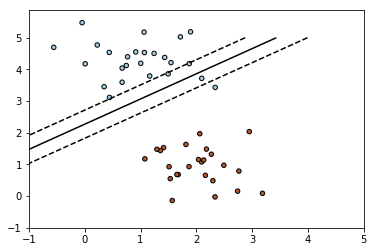

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()

基于iris数据集上的多层SGD

Automatically created module for IPython interactive environment


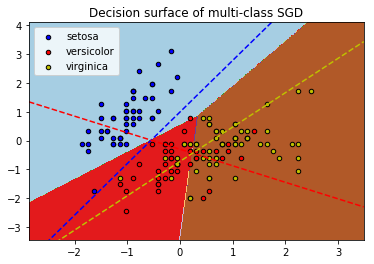

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

clf = SGDClassifier(alpha=0.001).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

(2) Perceptron

Automatically created module for IPython interactive environment


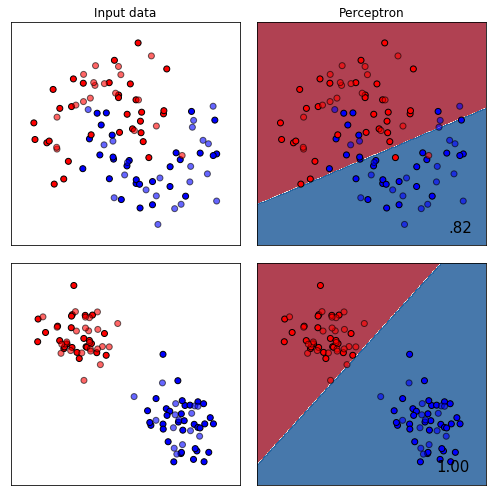

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_blobs

from sklearn.linear_model import Perceptron

h = .02  # step size in the mesh
names = ["Perceptron"]
classifiers = [Perceptron(n_iter=40,eta0=0.01,random_state=0)]
datasets = [make_moons(noise=0.3, random_state=0),
            make_blobs(n_features=2,centers=2, cluster_std=2)]

figure = plt.figure(figsize=(7, 7))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
        Z = Z.reshape(xx.shape)
        # Put the result into a color plot
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

## 3.3.2 分析示例

（1）分类损失在特征空间中的分布

不同损失函数下训练样本的损失值

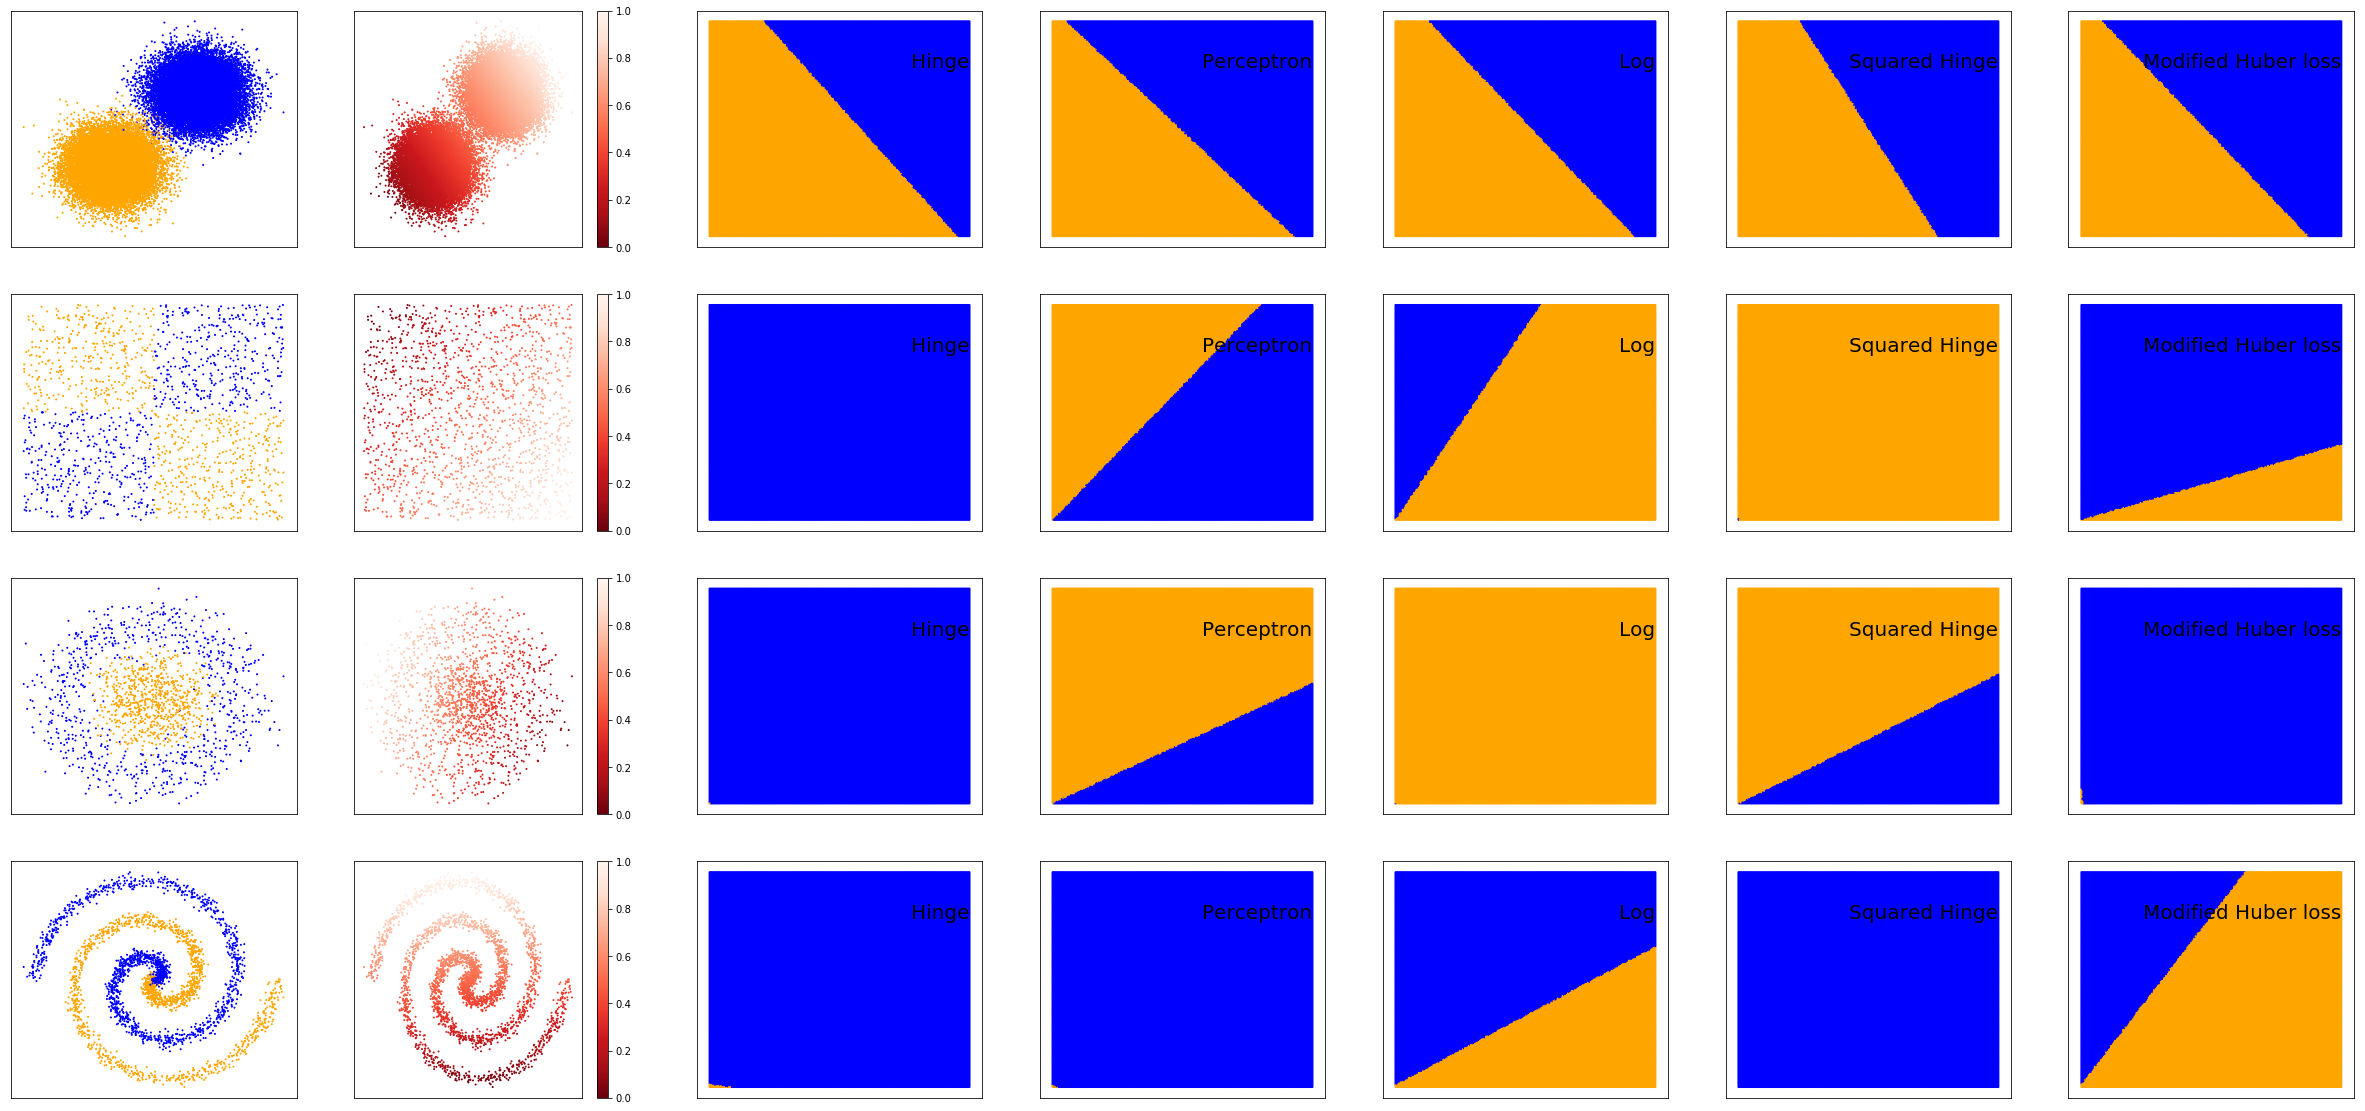

In [13]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
def ZoomIn(x,scal):
    minx=np.min(x)
    maxX=np.max(x)
    x=scal*(2*(x-minx)/(maxX-minx)-1)
    return x
def MaxMinNormalization(x):  
    x = (x - np.min(x)) / (np.max(x) - np.min(x));  
    return x;
def o2l(y):
    for i in range(0, len(y)):
        if y[i]>0 : 
            y[i]=1
        else:
            y[i]=-1
    return y
def datasetB(n):
    x,y=datasets.make_blobs(n_samples=n, centers=2, n_features=2, cluster_std=2, random_state=1)
    X=255*MaxMinNormalization(x)
    Y=o2l(y)             
    return X,Y
def datasetC(n):
    x,y= datasets.make_circles(n_samples=n, factor=0.3, noise=.2)
    X=255*MaxMinNormalization(x)
    Y=o2l(y)
    return X,Y
def datasetH(n):
    np.random.seed(0)
    t = 1 * np.pi * (0 + 3 * np.random.rand(1, n))
    x0 = -t * np.cos(t); x2 = t * np.cos(t); x=np.concatenate((x0, x2), axis=1)
    y0 = -t * np.sin(t); y2 = t * np.sin(t); y=np.concatenate((y0, y2), axis=1)
    X = np.concatenate((x, y))
    X += .3 * np.random.randn(2, 3000)
    X = X.T
    X=255*MaxMinNormalization(X)
    cs1=np.ones(1500); cs2=np.zeros(1500); y=np.concatenate((cs1, cs2))
    Y=o2l(y)
    return X,Y
def datasetR(n):
    x= np.random.rand(n, 2); X=255*x;
    Y=[]
    for i in range(0, n):
        if (X[:,0][i]<=128 and X[:,1][i]<=128) or (X[:,0][i]>128 and X[:,1][i]>128):
            Y.append(-1) 
        else:
            Y.append(1)
    return X,Y 
def meshgrid():
    a = np.linspace(0,255,256);b = np.linspace(0,255,256)
    [Xa,Yb] = np.meshgrid(a,b)
    points = [point for point in zip(Xa.flat,Yb.flat)]; np.random.shuffle(points)
    P=np.array(points)
    return P
def scatterD(X,Y):
    from matplotlib.colors import ListedColormap
    cm_bright = ListedColormap(['Blue', 'Orange']);
    plt.scatter(X[:,0], X[:,1], s=1, c=Y, cmap=cm_bright) 
    plt.xticks(());plt.yticks(())
def scatterC(X,t):
    cm = plt.cm.get_cmap('Reds_r')
    sc=plt.scatter(X[:,0], X[:,1], s=1, c=t, cmap=cm)
    plt.colorbar(sc)
    plt.xticks(());plt.yticks(())
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss
def SGDlossV(X,Y,Z,loss):
    model = linear_model.SGDClassifier()
    model.fit(X,Y)
    Y=model.predict(Z)
    df=model.decision_function(Z)
    df=ZoomIn(df,1)
    if loss=="hinge":                 loss=np.where(df < 1, 1 - df, 0)
    elif loss=="perceptron":          loss=-np.minimum(df, 0)
    elif loss=="log":                 loss=np.log2(1 + np.exp(-df))
    elif loss=="squared_hinge":       loss=np.where(df < 1, 1 - df, 0) ** 2
    elif loss=="modified_huber": loss=modified_huber_loss(df, 1)                                         
    t=preprocessing.scale(loss); t=MaxMinNormalization(t)
    return t
def Scatterall(i,j,k):
    plt.subplot(i,j,k); scatterD(X,Y)

    t=SGDlossV(X,Y,X,"hinge")
    plt.subplot(i,j,k+1);scatterC(X,t)
    
    P=meshgrid()
    model = linear_model.SGDClassifier(loss='hinge')
    model.fit(X,Y)
    pd=model.predict(P)
    plt.subplot(i,j,k+2);scatterD(P,pd);plt.text(255,200,"Hinge",size=20,horizontalalignment='right')

    P=meshgrid()
    model = linear_model.SGDClassifier(loss='perceptron')
    model.fit(X,Y)
    pd=model.predict(P)
    plt.subplot(i,j,k+3);scatterD(P,pd);plt.text(255,200,"Perceptron",size=20,horizontalalignment='right')

    P=meshgrid()
    model = linear_model.SGDClassifier(loss='log')
    model.fit(X,Y)
    pd=model.predict(P)
    plt.subplot(i,j,k+4);scatterD(P,pd);plt.text(255,200,"Log",size=20,horizontalalignment='right')

    P=meshgrid()
    model = linear_model.SGDClassifier(loss='squared_hinge')
    model.fit(X,Y)
    pd=model.predict(P)
    plt.subplot(i,j,k+5);scatterD(P,pd);plt.text(255,200,"Squared Hinge",size=20,horizontalalignment='right')
    
    P=meshgrid()
    model = linear_model.SGDClassifier(loss='modified_huber')
    model.fit(X,Y)
    pd=model.predict(P)
    plt.subplot(i,j,k+6);scatterD(P,pd);plt.text(255,200,"Modified Huber loss",size=20,horizontalalignment='right')   
#####################################
figure = plt.figure(figsize=(42, 20))
#####################################
X,Y=datasetB(50000);Scatterall(4,7,1)
#-----------------------------------#
X,Y=datasetR(1500); Scatterall(4,7,8)
#-----------------------------------#
X,Y=datasetC(1500); Scatterall(4,7,15)
#-----------------------------------#
X,Y=datasetH(1500); Scatterall(4,7,22)

不同损失函数下特征样本（特征空间）的损失值

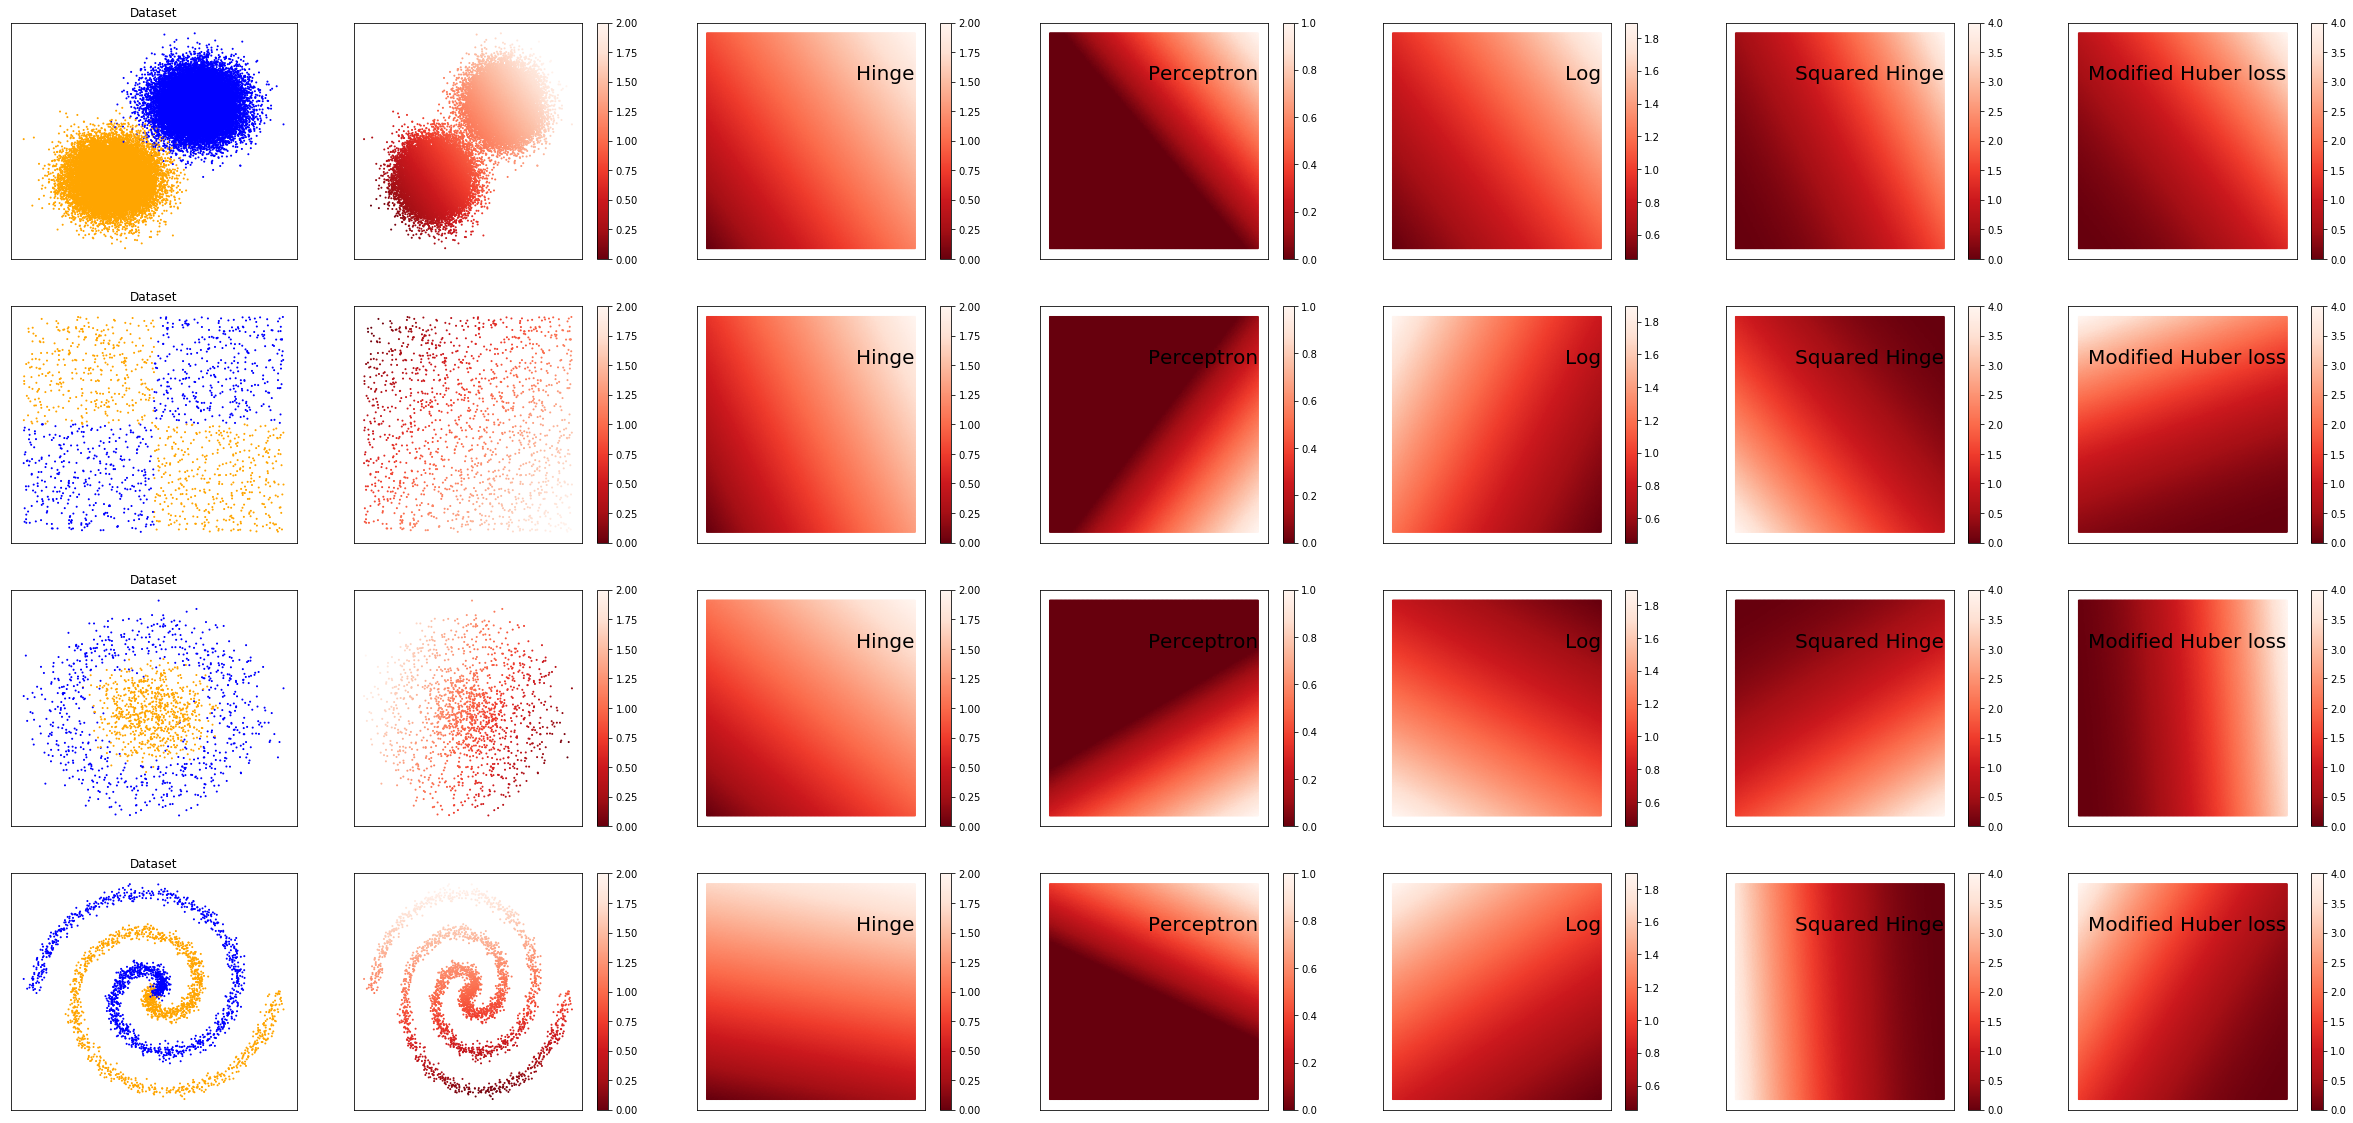

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model

def MaxMinNormalization(x):
    x = (x - np.min(x)) / (np.max(x) - np.min(x));  
    return x
def ZoomIn(x,scal):
    minx=np.min(x)
    maxX=np.max(x)
    x=scal*(2*(x-minx)/(maxX-minx)-1)
    return x
def o2l(y):
    for i in range(0, len(y)):
        if y[i]>0 : 
            y[i]=1
        else:
            y[i]=-1
    return y
def datasetB(n):
    x,y=datasets.make_blobs(n_samples=n, centers=2, n_features=2, cluster_std=2, random_state=1)
    X=255*MaxMinNormalization(x)
    Y=o2l(y)             
    return X,Y
def datasetC(n):
    x,y= datasets.make_circles(n_samples=n, factor=0.3, noise=.2)
    X=255*MaxMinNormalization(x)
    Y=o2l(y)
    return X,Y
def datasetH(n):
    np.random.seed(0)
    t = 1 * np.pi * (0 + 3 * np.random.rand(1, n))
    x0 = -t * np.cos(t); x2 = t * np.cos(t); x=np.concatenate((x0, x2), axis=1)
    y0 = -t * np.sin(t); y2 = t * np.sin(t); y=np.concatenate((y0, y2), axis=1)
    X = np.concatenate((x, y))
    X += .3 * np.random.randn(2, 3000)
    X = X.T
    X=255*MaxMinNormalization(X)
    cs1=np.ones(1500); cs2=np.zeros(1500); y=np.concatenate((cs1, cs2))
    Y=o2l(y)
    return X,Y
def datasetR(n):
    x= np.random.rand(n, 2); X=255*x;# x=zb[:, 0]; y=zb[:, 1]
    Y=[]
    for i in range(0, n):
        if (X[:,0][i]<=128 and X[:,1][i]<=128) or (X[:,0][i]>128 and X[:,1][i]>128):
            Y.append(-1) 
        else:
            Y.append(1)
    return X,Y 
def meshgrid():
    a = np.linspace(0,255,256);b = np.linspace(0,255,256)
    [Xa,Yb] = np.meshgrid(a,b)
    points = [point for point in zip(Xa.flat,Yb.flat)]; np.random.shuffle(points)
    P=np.array(points)
    return P
def scatterdataset(X,Y):
    from matplotlib.colors import ListedColormap
    cm_bright = ListedColormap(['Blue', 'Orange']);
    plt.scatter(X[:,0], X[:,1], s=1, c=Y, cmap=cm_bright)
    plt.title('Dataset') 
    plt.xticks(());plt.yticks(())
def scattertest(X,t):
    cm = plt.cm.get_cmap('Reds_r')
    sc=plt.scatter(X[:,0], X[:,1], s=1, c=t, cmap=cm)
    plt.colorbar(sc)
    plt.xticks(());plt.yticks(())
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss
def SGDlossV(X,Y,Z,lossn):
    model = linear_model.SGDClassifier(loss=lossn)
    model.fit(X,Y)
    Y=model.predict(Z)
    df=model.decision_function(Z)
    df=ZoomIn(df,1)
    if   lossn=="hinge":               t=np.where(df < 1, 1 - df, 0)                       
    elif lossn=="perceptron":          t=-np.minimum(df, 0)
    elif lossn=="log":                 t=np.log2(1 + np.exp(-df))
    elif lossn=="squared_hinge":       t=np.where(df < 1, 1 - df, 0) ** 2
    elif lossn=="modified_huber":      t=modified_huber_loss(df, 1)                                         
    return t
def Scatterall(i,j,k):
    plt.subplot(i,j,k); scatterdataset(X,Y)

    t=SGDlossV(X,Y,X,"hinge")
    plt.subplot(i,j,k+1);scattertest(X,t)

    P=meshgrid();t=SGDlossV(X,Y,P,"hinge")
    plt.subplot(i,j,k+2);scattertest(P,t);plt.text(255,200,"Hinge",size=20,horizontalalignment='right')

    P=meshgrid();t=SGDlossV(X,Y,P,"perceptron")
    plt.subplot(i,j,k+3);scattertest(P,t);plt.text(255,200,"Perceptron",size=20,horizontalalignment='right')

    P=meshgrid();t=SGDlossV(X,Y,P,"log")
    plt.subplot(i,j,k+4);scattertest(P,t);plt.text(255,200,"Log",size=20,horizontalalignment='right')

    P=meshgrid();t=SGDlossV(X,Y,P,"squared_hinge")
    plt.subplot(i,j,k+5);scattertest(P,t);plt.text(255,200,"Squared Hinge",size=20,horizontalalignment='right')
    
    P=meshgrid();t=SGDlossV(X,Y,P,"modified_huber")
    plt.subplot(i,j,k+6);scattertest(P,t);plt.text(255,200,"Modified Huber loss",size=20,horizontalalignment='right')  
#####################################
figure = plt.figure(figsize=(42, 20))
#####################################
X,Y=datasetB(50000);Scatterall(4,7,1)
#-----------------------------------#
X,Y=datasetR(1500); Scatterall(4,7,8)
#-----------------------------------#
X,Y=datasetC(1500); Scatterall(4,7,15)
#-----------------------------------#
X,Y=datasetH(1500); Scatterall(4,7,22)
#-----------------------------------

（2）学习率和正则化对结果的影响

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

#人工生成数据
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

#标准化输入
X = StandardScaler().fit_transform(X)

#训练模型
clf = SGDClassifier(loss="hinge", alpha=0.004, n_iter=200, fit_intercept=True,epsilon=0.01)
clf.fit(X, Y)

#以网格的方式得到分类边界
x_min, x_max = X.min() - .5, X.max() + .5
xx = np.linspace(x_min, x_max, 100)
yy = np.linspace(x_min, x_max, 100)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
    
#画出决策边界的等高线    
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = ['blue','red','blue']
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)

#画出各个点对于分类边界的距离
cm = plt.cm.RdBu
cm_bright = ListedColormap(['red', 'blue'])
prob_levels = range(-10,10,1)
plt.contourf(X1, X2, Z, prob_levels, cmap=cm, alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, alpha=.6)
plt.axis('square')


![](picture/linear3.png)